# Monthly Run Forward and Backward to the JDF

In [1]:
#import required libraries
import arrow
import datetime
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt

## Functions

In [2]:
def calculate_all(section, allv, folder, subfolder, lmax):
    final = {}
    mean = {}    
    filename = 'ariane_positions_quantitative.nc'
    fullfile = os.path.join('/ocean/rbeutel/MOAD/analysis-becca/Ariane/', folder, subfolder, filename)
    try:
        if os.stat(fullfile).st_size > 0:
            filegood = True
            data = xr.open_dataset(fullfile)
            final_section = data.variables['final_section'][:]
            final_transport = data.variables['final_transp'][:]
            transport = np.sum(np.where(final_section == section, final_transport, 0)) 
            #transport= the sum of particles through this section (m3/s), same as stats.txt summary once divided by 24
            for variable in allv:
                #this loop calculates the mean values shown in stats.txt final state tables
                if variable == 'final_age':
                    scale = 86400. # convert from seconds to days
                    final[variable] = float('NaN')
                    mean[variable] = float('NaN')
                else:
                    if transport == 0:
                        final[variable] = float('NaN')
                        mean[variable] = float('NaN')
                    else:
                        scale = 1.
                        final[variable] = data.variables[variable][:]/scale
                        mean[variable] = np.sum(np.where(final_section == section, final_transport*final[variable], 0))/transport
        else:
            filegood = False
            transport = float('NaN')
            print ("empty file")
    except OSError:
        filegood = False
        transport = float('NaN')
        print ('Missing Data')
    return filegood, transport/lmax, mean 

In [3]:
def get_data_all(start, endtime, section, allv, folder, subfolder, lmax): 
    #pretty sure the only difference between this and calculate_all is that this one seperates into days (susan wants me to do for whole month)
    timerange = arrow.Arrow.range('day', start, endtime)
    length = (endtime-start).days + 1
    transport = np.zeros(length)
    mean = {}
    for variable in allv:
        mean[variable] = np.zeros(length)
    time = []
    for i, r in enumerate(timerange):
        dir1 = r.format('DDMMMYY').lower()
#        print (dir1)
        filegood, transport[i], meanday = calculate_all(section, allv, folder, subfolder, lmax)
        for variable in allv:
            if filegood:
                mean[variable][i] = meanday[variable]
            else:
                mean[variable][i] = float('NaN')
        time.append(r.datetime)
    return transport[0], mean['final_salt'][0], mean['final_temp'][0]

## 201905_1h runs

In [4]:
#these values same across every run

#section number for each strait
meander = 0
admiralty = 2
deception = 3
rosario = 4
sanjuan = 5
haro = 6
straits = [meander, admiralty, deception, rosario, sanjuan, haro]

allv = ['final_age', 'final_depth', 'final_salt', 'final_temp', 'final_lon', 
        'init_depth', 'init_salt', 'init_temp', 'init_lat']

In [5]:
folder = 'jordan_manydays'
forward = ['forward_01mar19','forward_01jun19','forward_01sep19','forward_01dec19']
backward = ['backward_31mar19','backward_01jul19','backward_01oct19','backward_31dec19']

In [6]:
# mar_for = ['haro_forward_01mar19','rosario_forward_01mar19','sanjuan_forward_01mar19','admilralty_forward_01mar19' ,'deception_forward_01mar19']
# mar_back =['haro_backward_01mar19','rosario_backward_01mar19','sanjuan_backward_01mar19','admilralty_backward_01mar19','deception_backward_01mar19']

# jun_for = ['haro_forward_01jun19','rosario_forward_01jun19','sanjuan_forward_01jun19','admiralty_forward_01jun19','deception_forward_01jun19']
# jun_back = ['haro_backward_01jun19','rosario_backward_01jun19','sanjuan_backward_01jun19','admiralty_backward_01jun19','deception_backward_01jun19']

# sep_for = ['haro_forward_01sep19','rosario_forward_01sep19','sanjuan_forward_01sep19','admilralty_forward_01sep19','deception_forward_01sep19']
# sep_back = ['haro_backward_01sep19','rosario_backward_01sep19','sanjuan_backward_01sep19','admilralty_backward_01sep19','deception_backward_01sep19']

# dec_for = ['haro_forward_01dec19','rosario_forward_01dec19','sanjuan_forward_01dec19','admiralty_forward_01dec19' ,'deception_forward_01dec19']
# dec_back =['haro_backward_01dec19','rosario_backward_01dec19','sanjuan_backward_01dec19','admiralty_backward_01dec19','deception_backward_01dec19']



# allv = ['final_age', 'final_depth', 'final_salt', 'final_temp', 'final_lon', 
#         'init_depth', 'init_salt', 'init_temp', 'init_lat']
# section = 6 #Jordan River is always section 6 in every run

In [7]:
#the function works by jsut taking the length of time in days - soooooo this doesnt actually need to be this detailed
start_mar = datetime.datetime(2019, 3, 1) #first full day
end_mar = datetime.datetime(2019, 3, 30) #last full day

start_jun = datetime.datetime(2019, 6, 1) #first full day
end_jun = datetime.datetime(2019, 6, 30) #last full day

start_sep = datetime.datetime(2019, 9, 1) #first full day
end_sep = datetime.datetime(2019, 9, 30) #last full day

start_dec = datetime.datetime(2019, 12, 1) #first full day
end_dec = datetime.datetime(2019, 12, 30) #last full day

In [8]:
mar_for_temp, mar_for_sal, mar_for_trans = np.zeros(6), np.zeros(6), np.zeros(6)
mar_bac_temp, mar_bac_sal, mar_bac_trans = np.zeros(6), np.zeros(6), np.zeros(6)

jun_for_temp, jun_for_sal, jun_for_trans = np.zeros(6), np.zeros(6), np.zeros(6)
jun_bac_temp, jun_bac_sal, jun_bac_trans = np.zeros(6), np.zeros(6), np.zeros(6)

sep_for_temp, sep_for_sal, sep_for_trans = np.zeros(6), np.zeros(6), np.zeros(6)
sep_bac_temp, sep_bac_sal, sep_bac_trans = np.zeros(6), np.zeros(6), np.zeros(6)

dec_for_temp, dec_for_sal, dec_for_trans = np.zeros(6), np.zeros(6), np.zeros(6)
dec_bac_temp, dec_bac_sal, dec_bac_trans = np.zeros(6), np.zeros(6), np.zeros(6)

In [9]:
lmax = 720

k=0
for section in straits:
        mar_for_trans[k], mar_for_sal[k], mar_for_temp[k] = get_data_all(start_mar, end_mar, section, allv, folder, forward[0], lmax)
        jun_for_trans[k], jun_for_sal[k], jun_for_temp[k] = get_data_all(start_jun, end_jun, section, allv, folder,forward[1], lmax)
        sep_for_trans[k], sep_for_sal[k], sep_for_temp[k] = get_data_all(start_sep, end_sep, section, allv, folder,forward[2], lmax)
        dec_for_trans[k], dec_for_sal[k], dec_for_temp[k] = get_data_all(start_dec, end_dec, section, allv, folder,forward[3], lmax)
        
        mar_bac_trans[k], mar_bac_sal[k], mar_bac_temp[k] = get_data_all(start_mar, end_mar, section, allv, folder,backward[0], lmax)
        jun_bac_trans[k], jun_bac_sal[k], jun_bac_temp[k] = get_data_all(start_jun, end_jun, section, allv, folder,backward[1], lmax)
        sep_bac_trans[k], sep_bac_sal[k], sep_bac_temp[k] = get_data_all(start_sep, end_sep, section, allv, folder,backward[2], lmax)
        dec_bac_trans[k], dec_bac_sal[k], dec_bac_temp[k] = get_data_all(start_dec, end_dec, section, allv, folder,backward[3], lmax)
        
        k+=1

In [10]:
# #get average temperature, average salinity, and total transport in all of the runs through the JDF
# lmax = 720

# for i in range(len(mar_for_temp)):
#     mar_for_trans[i], mar_for_sal[i], mar_for_temp[i] = get_data_all(start_mar, end_mar, section, allv, mar_for[i], lmax)
#     mar_bac_trans[i], mar_bac_sal[i], mar_bac_temp[i] = get_data_all(start_mar, end_mar, section, allv, mar_back[i], lmax)
    
#     jun_for_trans[i], jun_for_sal[i], jun_for_temp[i] = get_data_all(start_jun, end_jun, section, allv, jun_for[i], lmax)
#     jun_bac_trans[i], jun_bac_sal[i], jun_bac_temp[i] = get_data_all(start_jun, end_jun, section, allv, jun_back[i], lmax)
    
#     sep_for_trans[i], sep_for_sal[i], sep_for_temp[i] = get_data_all(start_jun, end_jun, section, allv, sep_for[i], lmax)
#     sep_bac_trans[i], sep_bac_sal[i], sep_bac_temp[i] = get_data_all(start_jun, end_jun, section, allv, sep_back[i], lmax)
    
#     dec_for_trans[i], dec_for_sal[i], dec_for_temp[i] = get_data_all(start_dec, end_dec, section, allv, dec_for[i], lmax)
#     dec_bac_trans[i], dec_bac_sal[i], dec_bac_temp[i] = get_data_all(start_dec, end_dec, section, allv, dec_back[i], lmax)

Text(0, 0.5, 'Temperature (C$\\degree$)')

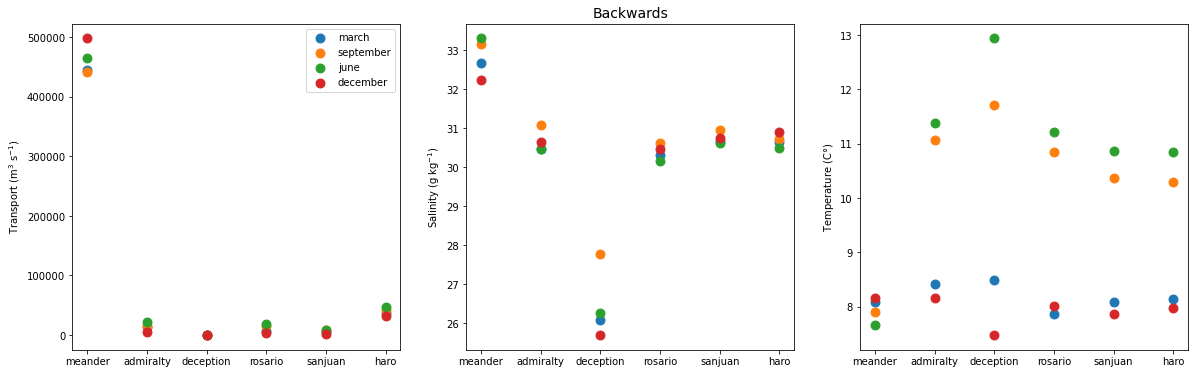

In [11]:
#backwards - refers to a backwards run, source determination, FROM jordan river TO the listed straits (OUT)
x = ['meander', 'admiralty', 'deception', 'rosario', 'sanjuan', 'haro']
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].scatter(x, mar_bac_trans, label = 'march', s = 80)
axs[0].scatter(x, sep_bac_trans, label = 'september', s = 80)
axs[0].scatter(x, jun_bac_trans, label = 'june', s = 80)
axs[0].scatter(x, dec_bac_trans, label = 'december', s = 80)
axs[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
axs[0].legend()

axs[1].scatter(x, mar_bac_sal, s = 80)#, label = 'march salinity')
axs[1].scatter(x, sep_bac_sal, s = 80)#, label = 'september salinity')
axs[1].scatter(x, jun_bac_sal, s = 80)
axs[1].scatter(x, dec_bac_sal, s = 80)
axs[1].set_ylabel('Salinity (g kg$^{-1}$)')
axs[1].set_title('Backwards', fontsize = 14)

axs[2].scatter(x, mar_bac_temp, s = 80)#, label = 'march temperature')
axs[2].scatter(x, sep_bac_temp, s = 80)#, label = 'september temperature')
axs[2].scatter(x, jun_bac_temp, s = 80)
axs[2].scatter(x, dec_bac_temp, s = 80)
axs[2].set_ylabel('Temperature (C$\degree$)')

Text(0, 0.5, 'Temperature (C$\\degree$)')

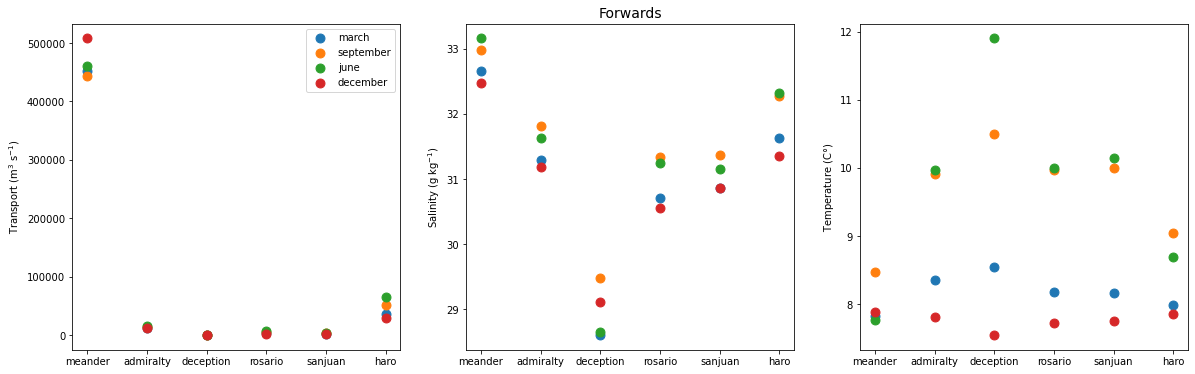

In [12]:
#forwards - refers to a forward run FROM jordan river to the listed strait (IN)
x = ['meander', 'admiralty', 'deception', 'rosario', 'sanjuan', 'haro']
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].scatter(x, mar_for_trans, label = 'march', s = 80)
axs[0].scatter(x, sep_for_trans, label = 'september', s = 80)
axs[0].scatter(x, jun_for_trans, label = 'june', s = 80)
axs[0].scatter(x, dec_for_trans, label = 'december', s = 80)
axs[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
axs[0].legend()

axs[1].scatter(x, mar_for_sal, s = 80)#, label = 'march salinity')
axs[1].scatter(x, sep_for_sal, s = 80)#, label = 'september salinity')
axs[1].scatter(x, jun_for_sal, s = 80)
axs[1].scatter(x, dec_for_sal, s = 80)
axs[1].set_ylabel('Salinity (g kg$^{-1}$)')
axs[1].set_title('Forwards', fontsize = 14)

axs[2].scatter(x, mar_for_temp, s = 80)#, label = 'march temperature')
axs[2].scatter(x, sep_for_temp, s = 80)#, label = 'september temperature')
axs[2].scatter(x, jun_for_temp, s = 80)
axs[2].scatter(x, dec_for_temp, s = 80)
axs[2].set_ylabel('Temperature (C$\degree$)')

Text(0, 0.5, 'Transport (m$^{3}$ s$^{-1}$)')

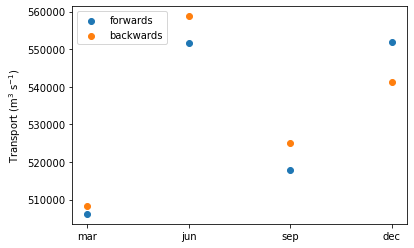

In [13]:
#transport sums
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans), sum(jun_for_trans), sum(sep_for_trans), sum(dec_for_trans)], label = 'forwards')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans), sum(jun_bac_trans), sum(sep_bac_trans), sum(dec_bac_trans)], label = 'backwards')
plt.legend()
# plt.ylim(0,8500000)
plt.ylabel('Transport (m$^{3}$ s$^{-1}$)')

In [14]:
#tranport sums per strait (SoG v. Puget) instead of per channel
Puget_bac = [sum(mar_bac_trans[1:3]),sum(jun_bac_trans[1:3]), sum(sep_bac_trans[1:3]), sum(dec_bac_trans[1:3])]
Puget_for = [sum(mar_for_trans[1:3]),sum(jun_for_trans[1:3]), sum(sep_for_trans[1:3]), sum(dec_for_trans[1:3])]

SoG_bac = [sum(mar_bac_trans[3:]),sum(jun_bac_trans[3:]), sum(sep_bac_trans[3:]), sum(dec_bac_trans[3:])]
SoG_for = [sum(mar_for_trans[3:]),sum(jun_for_trans[3:]), sum(sep_for_trans[3:]), sum(dec_for_trans[3:])]

Text(0.5, 1.0, 'Puget Sound')

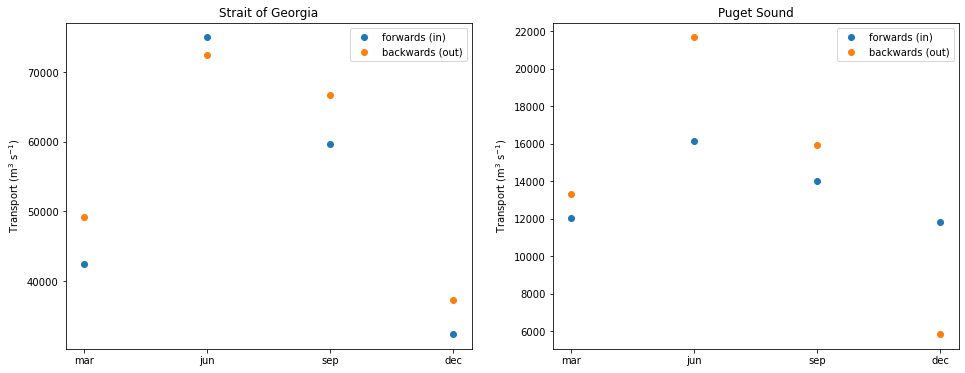

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for, label = 'forwards (in)')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac, label = 'backwards (out)')
ax[0].legend()
# ax[0].set_ylim(0,7000000)
ax[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[0].set_title('Strait of Georgia')

ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for, label = 'forwards (in)')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac, label = 'backwards (out)')
ax[1].legend()
# ax[1].set_ylim(0,7000000)
ax[1].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[1].set_title('Puget Sound')

## Comparison to 201905_1h with Straight line across JDF

In [16]:
folder = 'JRstraight_201905_monthly'
forward = ['forward_01mar19','forward_01jun19','forward_01sep19','forward_01dec19']
backward = ['backward_31mar19','backward_01jul19','backward_01oct19','backward_31dec19']

In [17]:
mar_for_trans_straight = np.zeros(6)
mar_bac_trans_straight = np.zeros(6)

jun_for_trans_straight = np.zeros(6)
jun_bac_trans_straight = np.zeros(6)

sep_for_trans_straight = np.zeros(6)
sep_bac_trans_straight = np.zeros(6)

dec_for_trans_straight = np.zeros(6)
dec_bac_trans_straight = np.zeros(6)

In [18]:
lmax = 720

k=0
for section in straits:
        mar_for_trans_straight[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, forward[0], lmax)
        jun_for_trans_straight[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, forward[1], lmax)
        sep_for_trans_straight[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, forward[2], lmax)
        dec_for_trans_straight[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, forward[3], lmax)
        
        mar_bac_trans_straight[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, backward[0], lmax)
        jun_bac_trans_straight[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, backward[1], lmax)
        sep_bac_trans_straight[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, backward[2], lmax)
        dec_bac_trans_straight[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, backward[3], lmax)
        
        k+=1

Text(0, 0.5, 'Transport (m$^{3}$ s$^{-1}$)')

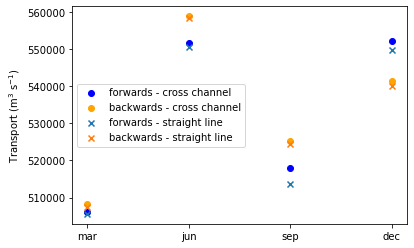

In [19]:
#transport sums
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans), sum(jun_for_trans), sum(sep_for_trans), sum(dec_for_trans)], label = 'forwards - cross channel', c='b')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans), sum(jun_bac_trans), sum(sep_bac_trans), sum(dec_bac_trans)], label = 'backwards - cross channel', c='orange')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans_straight), sum(jun_for_trans_straight), sum(sep_for_trans_straight), sum(dec_for_trans_straight)], label = 'forwards - straight line', marker='x')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans_straight), sum(jun_bac_trans_straight), sum(sep_bac_trans_straight), sum(dec_bac_trans_straight)], label = 'backwards - straight line', marker ='x')
plt.legend()
# plt.ylim(0,8500000)
plt.ylabel('Transport (m$^{3}$ s$^{-1}$)')

In [20]:
#tranport sums per strait (SoG v. Puget) instead of per channel
Puget_bac_straight = [sum(mar_bac_trans_straight[1:3]),sum(jun_bac_trans_straight[1:3]), sum(sep_bac_trans_straight[1:3]), sum(dec_bac_trans_straight[1:3])]
Puget_for_straight = [sum(mar_for_trans_straight[1:3]),sum(jun_for_trans_straight[1:3]), sum(sep_for_trans_straight[1:3]), sum(dec_for_trans_straight[1:3])]

SoG_bac_straight = [sum(mar_bac_trans_straight[3:]),sum(jun_bac_trans_straight[3:]), sum(sep_bac_trans_straight[3:]), sum(dec_bac_trans_straight[3:])]
SoG_for_straight = [sum(mar_for_trans_straight[3:]),sum(jun_for_trans_straight[3:]), sum(sep_for_trans_straight[3:]), sum(dec_for_trans_straight[3:])]

Text(0.5, 1.0, 'Puget Sound')

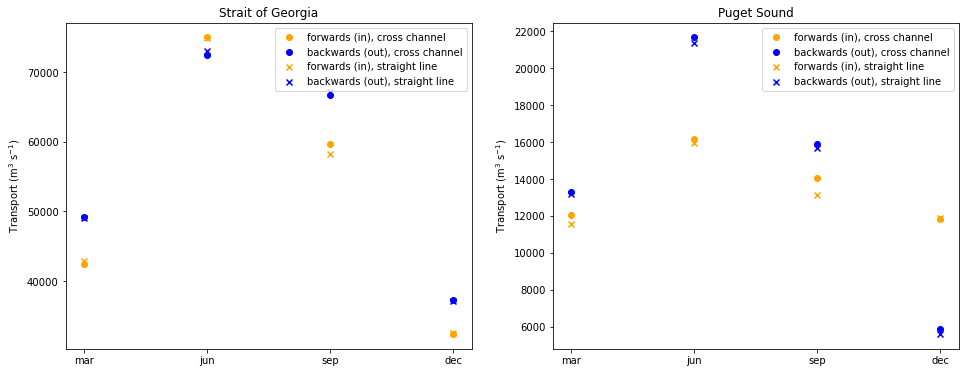

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for,c= 'orange', label = 'forwards (in), cross channel')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac,  c= 'b',label = 'backwards (out), cross channel')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for_straight, c= 'orange', marker = 'x', label = 'forwards (in), straight line')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac_straight, c= 'b', marker= 'x', label = 'backwards (out), straight line')
ax[0].legend()
# ax[0].set_ylim(0,7000000)
ax[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[0].set_title('Strait of Georgia')

ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for,  c= 'orange',label = 'forwards (in), cross channel')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac,  c= 'b',label = 'backwards (out), cross channel')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for_straight,  c= 'orange',marker = 'x',label = 'forwards (in), straight line')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac_straight,  c= 'b',marker = 'x',label = 'backwards (out), straight line')
ax[1].legend()
# ax[1].set_ylim(0,7000000)
ax[1].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[1].set_title('Puget Sound')

## Comparison to 201905_1h with $max transport = 1000 m^3 /s$ (instead of $5000 m^3 /s$)
-> increase in resolution

In [22]:
folder = 'jordan_manydays1000'
forward = ['forward_01mar19','forward_01jun19','forward_01sep19','forward_01dec19']
backward = ['backward_31mar19','backward_01jul19','backward_01oct19','backward_31dec19']

In [23]:
mar_for_trans1000 = np.zeros(6)
mar_bac_trans1000 = np.zeros(6)

jun_for_trans1000 = np.zeros(6)
jun_bac_trans1000 = np.zeros(6)

sep_for_trans1000 = np.zeros(6)
sep_bac_trans1000 = np.zeros(6)

dec_for_trans1000 = np.zeros(6)
dec_bac_trans1000 = np.zeros(6)

In [24]:
lmax = 720

k=0
for section in straits:
        mar_for_trans1000[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, forward[0], lmax)
        jun_for_trans1000[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, forward[1], lmax)
        sep_for_trans1000[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, forward[2], lmax)
        dec_for_trans1000[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, forward[3], lmax)
        
        mar_bac_trans1000[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, backward[0], lmax)
        jun_bac_trans1000[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, backward[1], lmax)
        sep_bac_trans1000[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, backward[2], lmax)
        dec_bac_trans1000[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, backward[3], lmax)
        
        k+=1

Text(0, 0.5, 'Transport (m$^{3}$ s$^{-1}$)')

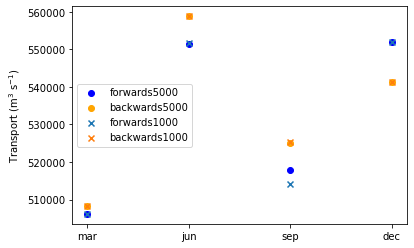

In [25]:
#transport sums
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans), sum(jun_for_trans), sum(sep_for_trans), sum(dec_for_trans)], label = 'forwards5000', c='b')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans), sum(jun_bac_trans), sum(sep_bac_trans), sum(dec_bac_trans)], label = 'backwards5000', c='orange')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans1000), sum(jun_for_trans1000), sum(sep_for_trans1000), sum(dec_for_trans1000)], label = 'forwards1000', marker='x')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans1000), sum(jun_bac_trans1000), sum(sep_bac_trans1000), sum(dec_bac_trans1000)], label = 'backwards1000', marker ='x')
plt.legend()
# plt.ylim(0,8500000)
plt.ylabel('Transport (m$^{3}$ s$^{-1}$)')

In [26]:
#tranport sums per strait (SoG v. Puget) instead of per channel
Puget_bac1000 = [sum(mar_bac_trans1000[1:3]),sum(jun_bac_trans1000[1:3]), sum(sep_bac_trans1000[1:3]), sum(dec_bac_trans1000[1:3])]
Puget_for1000 = [sum(mar_for_trans1000[1:3]),sum(jun_for_trans1000[1:3]), sum(sep_for_trans1000[1:3]), sum(dec_for_trans1000[1:3])]

SoG_bac1000 = [sum(mar_bac_trans1000[3:]),sum(jun_bac_trans1000[3:]), sum(sep_bac_trans1000[3:]), sum(dec_bac_trans1000[3:])]
SoG_for1000 = [sum(mar_for_trans1000[3:]),sum(jun_for_trans1000[3:]), sum(sep_for_trans1000[3:]), sum(dec_for_trans1000[3:])]

Text(0.5, 1.0, 'Puget Sound')

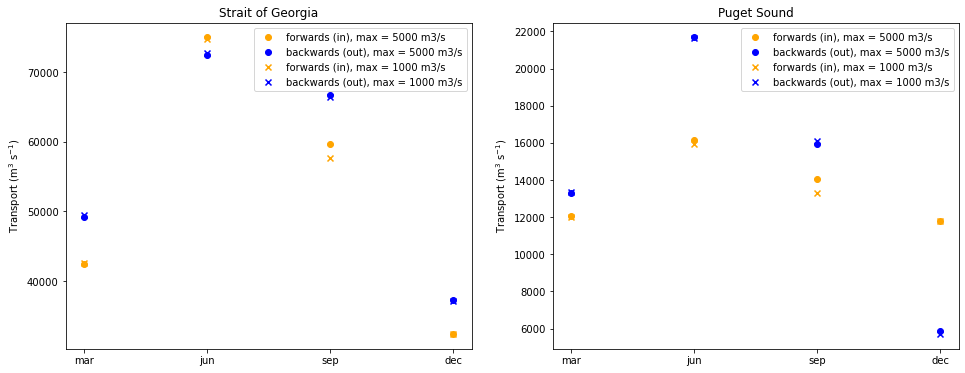

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for,c= 'orange', label = 'forwards (in), max = 5000 m3/s')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac,  c= 'b',label = 'backwards (out), max = 5000 m3/s')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for1000, c= 'orange', marker = 'x', label = 'forwards (in), max = 1000 m3/s')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac1000, c= 'b', marker= 'x', label = 'backwards (out), max = 1000 m3/s')
ax[0].legend()
# ax[0].set_ylim(0,7000000)
ax[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[0].set_title('Strait of Georgia')

ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for,  c= 'orange',label = 'forwards (in), max = 5000 m3/s')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac,  c= 'b',label = 'backwards (out), max = 5000 m3/s')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for1000,  c= 'orange',marker = 'x',label = 'forwards (in), max = 1000 m3/s')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac1000,  c= 'b',marker = 'x',label = 'backwards (out), max = 1000 m3/s')
ax[1].legend()
# ax[1].set_ylim(0,7000000)
ax[1].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[1].set_title('Puget Sound')

## Comparison to 201812_1h runs (same segrid and namelist)

In [28]:
folder = '201812_1h'
forward = ['1h_forward_01mar19','1h_forward_01jun19','1h_forward_01sep19','1h_forward_01dec19']
backward = ['1h_backward_31mar19','1h_backward_01jul19','1h_backward_01oct19','1h_backward_31dec19']

In [29]:
mar_for_trans201812 = np.zeros(6)
mar_bac_trans201812 = np.zeros(6)

jun_for_trans201812 = np.zeros(6)
jun_bac_trans201812 = np.zeros(6)

sep_for_trans201812 = np.zeros(6)
sep_bac_trans201812 = np.zeros(6)

dec_for_trans201812 = np.zeros(6)
dec_bac_trans201812 = np.zeros(6)

In [30]:
lmax = 720

k=0
for section in straits:
        mar_for_trans201812[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, forward[0], lmax)
        jun_for_trans201812[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, forward[1], lmax)
        sep_for_trans201812[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, forward[2], lmax)
        dec_for_trans201812[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, forward[3], lmax)
        
        mar_bac_trans201812[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, backward[0], lmax)
        jun_bac_trans201812[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, backward[1], lmax)
        sep_bac_trans201812[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, backward[2], lmax)
        dec_bac_trans201812[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, backward[3], lmax)
        
        k+=1

Text(0, 0.5, 'Transport (m$^{3}$ s$^{-1}$)')

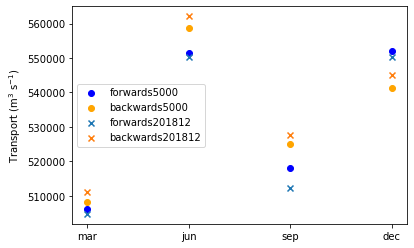

In [31]:
#transport sums
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans), sum(jun_for_trans), sum(sep_for_trans), sum(dec_for_trans)], label = 'forwards5000', c='b')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans), sum(jun_bac_trans), sum(sep_bac_trans), sum(dec_bac_trans)], label = 'backwards5000', c='orange')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans201812), sum(jun_for_trans201812), sum(sep_for_trans201812), sum(dec_for_trans201812)], label = 'forwards201812', marker='x')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans201812), sum(jun_bac_trans201812), sum(sep_bac_trans201812), sum(dec_bac_trans201812)], label = 'backwards201812', marker ='x')
plt.legend()
# plt.ylim(0,8500000)
plt.ylabel('Transport (m$^{3}$ s$^{-1}$)')

In [32]:
#tranport sums per strait (SoG v. Puget) instead of per channel
Puget_bac201812 = [sum(mar_bac_trans201812[1:3]),sum(jun_bac_trans201812[1:3]), sum(sep_bac_trans201812[1:3]), sum(dec_bac_trans201812[1:3])]
Puget_for201812 = [sum(mar_for_trans201812[1:3]),sum(jun_for_trans201812[1:3]), sum(sep_for_trans201812[1:3]), sum(dec_for_trans201812[1:3])]

SoG_bac201812 = [sum(mar_bac_trans201812[3:]),sum(jun_bac_trans201812[3:]), sum(sep_bac_trans201812[3:]), sum(dec_bac_trans201812[3:])]
SoG_for201812 = [sum(mar_for_trans201812[3:]),sum(jun_for_trans201812[3:]), sum(sep_for_trans201812[3:]), sum(dec_for_trans201812[3:])]

Text(0.5, 1.0, 'Puget Sound')

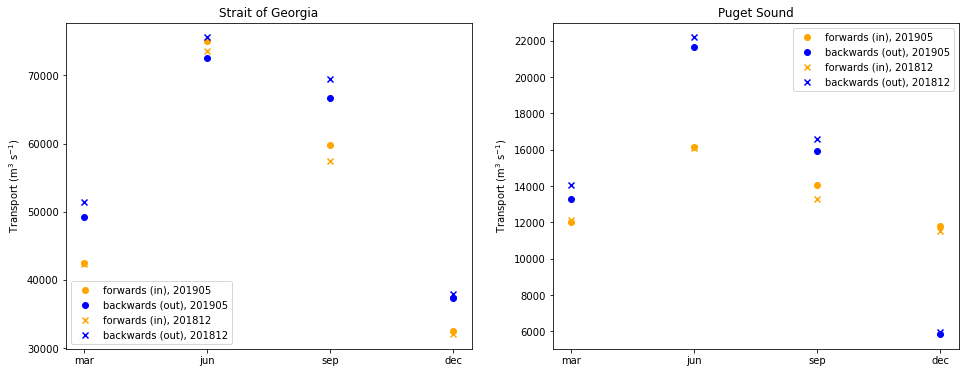

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for,c= 'orange', label = 'forwards (in), 201905')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac,  c= 'b',label = 'backwards (out), 201905')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for201812, c= 'orange', marker = 'x', label = 'forwards (in), 201812')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac201812, c= 'b', marker= 'x', label = 'backwards (out), 201812')
ax[0].legend()
# ax[0].set_ylim(0,7000000)
ax[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[0].set_title('Strait of Georgia')

ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for,  c= 'orange',label = 'forwards (in), 201905')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac,  c= 'b',label = 'backwards (out), 201905')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for201812,  c= 'orange',marker = 'x',label = 'forwards (in), 201812')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac201812,  c= 'b',marker = 'x',label = 'backwards (out), 201812')
ax[1].legend()
# ax[1].set_ylim(0,7000000)
ax[1].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[1].set_title('Puget Sound')

## Comparison to 201812_1d runs

In [34]:
folder = '201812_1d'
forward = ['1d_forward_01mar19','1d_forward_01jun19','1d_forward_01sep19','1d_forward_01dec19']
backward = ['1d_backward_31mar19','1d_backward_01jul19','1d_backward_01oct19','1d_backward_31dec19']

In [35]:
mar_for_trans1d = np.zeros(6)
mar_bac_trans1d = np.zeros(6)

jun_for_trans1d = np.zeros(6)
jun_bac_trans1d = np.zeros(6)

sep_for_trans1d = np.zeros(6)
sep_bac_trans1d = np.zeros(6)

dec_for_trans1d = np.zeros(6)
dec_bac_trans1d = np.zeros(6)

In [36]:
lmax = 30

k=0
for section in straits:
        mar_for_trans1d[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, forward[0], lmax)
        jun_for_trans1d[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, forward[1], lmax)
        sep_for_trans1d[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, forward[2], lmax)
        dec_for_trans1d[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, forward[3], lmax)
        
        mar_bac_trans1d[k], _, _ = get_data_all(start_mar, end_mar, section, allv, folder, backward[0], lmax)
        jun_bac_trans1d[k], _, _ = get_data_all(start_jun, end_jun, section, allv, folder, backward[1], lmax)
        sep_bac_trans1d[k], _, _ = get_data_all(start_sep, end_sep, section, allv, folder, backward[2], lmax)
        dec_bac_trans1d[k], _, _ = get_data_all(start_dec, end_dec, section, allv, folder, backward[3], lmax)
        
        k+=1

Text(0, 0.5, 'Transport (m$^{3}$ s$^{-1}$)')

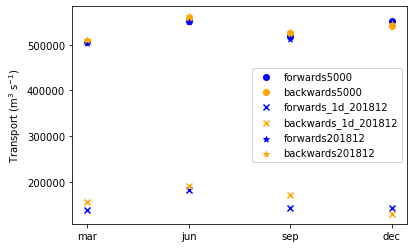

In [39]:
#transport sums
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans), sum(jun_for_trans), sum(sep_for_trans), sum(dec_for_trans)], label = 'forwards5000', c='b')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans), sum(jun_bac_trans), sum(sep_bac_trans), sum(dec_bac_trans)], label = 'backwards5000', c='orange')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans1d), sum(jun_for_trans1d), sum(sep_for_trans1d), sum(dec_for_trans1d)], label = 'forwards_1d_201812', marker='x', c= 'b')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans1d), sum(jun_bac_trans1d), sum(sep_bac_trans1d), sum(dec_bac_trans1d)], label = 'backwards_1d_201812', marker ='x', c='orange')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_for_trans201812), sum(jun_for_trans201812), sum(sep_for_trans201812), sum(dec_for_trans201812)], label = 'forwards201812', marker='*', c='b')
plt.scatter(['mar', 'jun', 'sep', 'dec'], [sum(mar_bac_trans201812), sum(jun_bac_trans201812), sum(sep_bac_trans201812), sum(dec_bac_trans201812)], label = 'backwards201812', marker ='*', c='orange')
plt.legend()
# plt.ylim(0,8500000)
plt.ylabel('Transport (m$^{3}$ s$^{-1}$)')

In [40]:
#tranport sums per strait (SoG v. Puget) instead of per channel
Puget_bac201812_1d = [sum(mar_bac_trans1d[1:3]),sum(jun_bac_trans1d[1:3]), sum(sep_bac_trans1d[1:3]), sum(dec_bac_trans1d[1:3])]
Puget_for201812_1d = [sum(mar_for_trans1d[1:3]),sum(jun_for_trans1d[1:3]), sum(sep_for_trans1d[1:3]), sum(dec_for_trans1d[1:3])]

SoG_bac201812_1d = [sum(mar_bac_trans1d[3:]),sum(jun_bac_trans1d[3:]), sum(sep_bac_trans1d[3:]), sum(dec_bac_trans1d[3:])]
SoG_for201812_1d = [sum(mar_for_trans1d[3:]),sum(jun_for_trans1d[3:]), sum(sep_for_trans1d[3:]), sum(dec_for_trans1d[3:])]

Text(0.5, 1.0, 'Puget Sound')

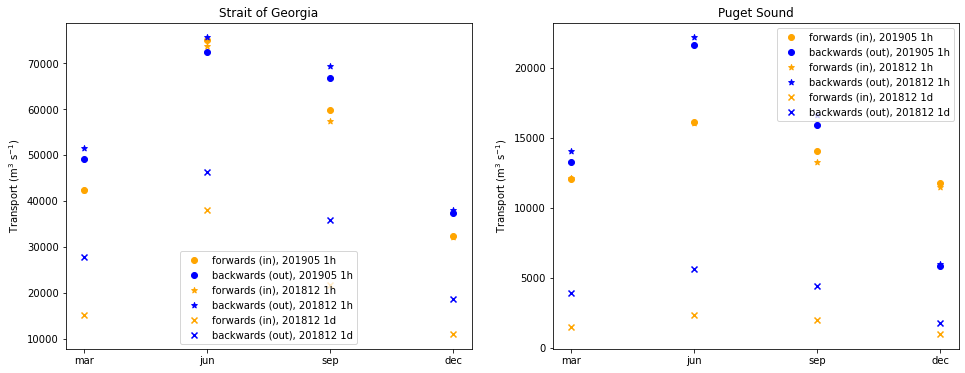

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for,c= 'orange', label = 'forwards (in), 201905 1h')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac,  c= 'b',label = 'backwards (out), 201905 1h')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for201812, c= 'orange', marker = '*', label = 'forwards (in), 201812 1h')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac201812, c= 'b', marker= '*', label = 'backwards (out), 201812 1h')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_for201812_1d, c= 'orange', marker = 'x', label = 'forwards (in), 201812 1d')
ax[0].scatter(['mar', 'jun', 'sep', 'dec'], SoG_bac201812_1d, c= 'b', marker= 'x', label = 'backwards (out), 201812 1d')
ax[0].legend()
# ax[0].set_ylim(0,7000000)
ax[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[0].set_title('Strait of Georgia')

ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for,  c= 'orange',label = 'forwards (in), 201905 1h')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac,  c= 'b',label = 'backwards (out), 201905 1h')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for201812,  c= 'orange',marker = '*',label = 'forwards (in), 201812 1h')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac201812,  c= 'b',marker = '*',label = 'backwards (out), 201812 1h')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_for201812_1d,  c= 'orange',marker = 'x',label = 'forwards (in), 201812 1d')
ax[1].scatter(['mar', 'jun', 'sep', 'dec'], Puget_bac201812_1d,  c= 'b',marker = 'x',label = 'backwards (out), 201812 1d')
ax[1].legend()
# ax[1].set_ylim(0,7000000)
ax[1].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
ax[1].set_title('Puget Sound')